In [259]:
import os

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [260]:
from google.colab import drive
drive.mount('/content/drive')
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['.config', 'vehicle_data.csv', 'drive', 'sample_data']

In [261]:
dir = "drive/MyDrive/CarPricePrediction"
!unzip drive/MyDrive/CarPricePrediction/dataset.zip

Archive:  drive/MyDrive/CarPricePrediction/dataset.zip
replace vehicle_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: vehicle_data.csv        


In [262]:
df = pd.read_csv('vehicle_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [263]:
df.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00


In [264]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123971 entries, 0 to 123970
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Title           123971 non-null  object
 1   Sub_title       123971 non-null  object
 2   Price           123971 non-null  object
 3   Brand           123971 non-null  object
 4   Model           123970 non-null  object
 5   Edition         47538 non-null   object
 6   Year            123971 non-null  int64 
 7   Condition       123971 non-null  object
 8   Transmission    123970 non-null  object
 9   Body            118876 non-null  object
 10  Fuel            123971 non-null  object
 11  Capacity        123766 non-null  object
 12  Mileage         123971 non-null  object
 13  Location        123971 non-null  object
 14  Description     107797 non-null  object
 15  Post_URL        123971 non-null  object
 16  Seller_name     123873 non-null  object
 17  Seller_type     123971 non-nu

Title                 0
Sub_title             0
Price                 0
Brand                 0
Model                 1
Edition           76433
Year                  0
Condition             0
Transmission          1
Body               5095
Fuel                  0
Capacity            205
Mileage               0
Location              0
Description       16174
Post_URL              0
Seller_name          98
Seller_type           0
published_date        0
dtype: int64

In [265]:
df = df.drop(["Title", "Edition", "Sub_title", "Post_URL", "Seller_name", "Seller_type", "Description", "published_date", "Location"], axis = 1)
df.head()

,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,"Rs 12,900,000",Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km"
1,"Rs 16,250,000",Jaguar,XF,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km"
2,"Rs 17,000,000",Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km"
3,"Rs 13,000,000",Toyota,CHR,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km"
4,"Rs 33,500,000",Toyota,Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km"


In [266]:
df = df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118669 entries, 0 to 123970
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Price         118669 non-null  object
 1   Brand         118669 non-null  object
 2   Model         118669 non-null  object
 3   Year          118669 non-null  int64 
 4   Condition     118669 non-null  object
 5   Transmission  118669 non-null  object
 6   Body          118669 non-null  object
 7   Fuel          118669 non-null  object
 8   Capacity      118669 non-null  object
 9   Mileage       118669 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.0+ MB


In [267]:
df['Price'].unique()

array(['Rs 12,900,000', 'Rs 16,250,000', 'Rs 17,000,000', ...,
       ' Rs. 93,500', ' Rs. 150,000,000', ' Rs. 1,525,700'], dtype=object)

In [268]:
# Price cleaning
df['Price'] = df['Price'].apply(lambda x:x.split(' ')[-1])
df['Price'] = df['Price'].apply(lambda x:str(x).replace(',',''))
# df['Price'] = df['Price'].astype(float)

df.head()


,Price,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,12900000,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km"
1,16250000,Jaguar,XF,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km"
2,17000000,Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km"
3,13000000,Toyota,CHR,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km"
4,33500000,Toyota,Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km"


In [275]:
# capacity cleaning
df['Capacity'] = df['Capacity'].apply(lambda x:str(x).split(' ')[0])
df['Capacity'] = df['Capacity'].apply(lambda x:str(x).replace(",", ""))
df['Capacity'] = df['Capacity'].astype(float)

df.head()

ValueError: ignored

In [173]:
# Mileage cleaning
df['Mileage'] = df['Mileage'].apply(lambda x:str(x).split(' ')[0])
df['Mileage'] = df['Mileage'].apply(lambda x:str(x).replace(",", ""))
df['Mileage'] = df['Mileage'].astype(float)

df.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,12900000.0,Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,1500,37000.0
1,16250000.0,Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,2200,42000.0
2,17000000.0,Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,1200,15000.0
3,13000000.0,Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,1200,21000.0
4,33500000.0,Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700,57000.0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44558 entries, 0 to 61679
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         44558 non-null  float64
 1   Brand         44558 non-null  object 
 2   Model         44558 non-null  object 
 3   Edition       44558 non-null  object 
 4   Year          44558 non-null  int64  
 5   Condition     44558 non-null  object 
 6   Transmission  44558 non-null  object 
 7   Body          44558 non-null  object 
 8   Fuel          44558 non-null  object 
 9   Capacity      44558 non-null  int64  
 10  Mileage       44558 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.1+ MB


In [175]:
df['Transmission'].value_counts()

Automatic             30107
Manual                10150
Tiptronic              4275
Other transmission       26
Name: Transmission, dtype: int64

In [177]:
df = df.replace({'Transmission': {"Automatic": 0, "Manual": 1, "Tiptronic": 2, "Other transmission": 3}})
df['Transmission'].value_counts()

0    30107
1    10150
2     4275
3       26
Name: Transmission, dtype: int64

In [178]:
df['Condition'].value_counts()

Used             42782
Reconditioned     1290
New                486
Name: Condition, dtype: int64

In [179]:
df = df.replace({'Condition': {"New": 0, "Used": 1, "Reconditioned": 2}})
df['Condition'].value_counts()

1    42782
2     1290
0      486
Name: Condition, dtype: int64

In [180]:
df['Fuel'].value_counts()

Petrol             31010
Hybrid              7020
Diesel              6204
Electric             272
Other fuel type       31
CNG                   21
Name: Fuel, dtype: int64

In [182]:
df = df.replace({'Fuel': {"Petrol": 0, "Diesel": 1, "Hybrid": 2, "Electric": 3, "CNG": 4, "Other fuel type": 5}})
df['Fuel'].value_counts()

0    31010
2     7020
1     6204
3      272
5       31
4       21
Name: Fuel, dtype: int64

In [183]:
df.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,12900000.0,Honda,Vezel,Limited,2017,1,0,SUV / 4x4,2,1500,37000.0
1,16250000.0,Jaguar,XF,Fully Loaded,2013,1,0,Saloon,1,2200,42000.0
2,17000000.0,Toyota,CHR,GT New Face 2wd,2020,1,0,SUV / 4x4,0,1200,15000.0
3,13000000.0,Toyota,CHR,Toyato,2017,1,0,SUV / 4x4,0,1200,21000.0
4,33500000.0,Toyota,Land Cruiser Prado,prado,2015,1,0,SUV / 4x4,0,2700,57000.0


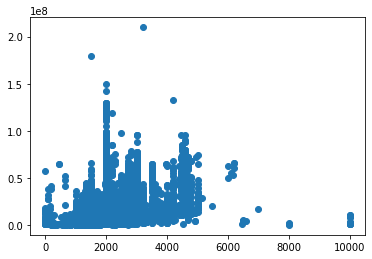

In [217]:
plt.scatter(df['Capacity'], df['Price'])
plt.show()

Feature selection

In [241]:
# Taking only wanted columns to split (Feature selection)
# X = df.drop(["Brand", "Model", "Edition", "Body", "Price"], axis = 1)
X = df[["Capacity", "Year", "Condition", "Transmission", "Fuel", "Mileage"]]
Y = df['Price']

Splitting dataset to training and testing data

In [243]:
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.1)

In [244]:
print(xTrain)

       Capacity  Year  Condition  Transmission  Fuel   Mileage
17973      1200  1976          1             1     0   48500.0
50095       660  2020          1             0     0   20000.0
42595      1000  2018          1             2     0   65000.0
21805      2800  2019          1             0     1   47000.0
21978       650  2016          1             0     2   37000.0
...         ...   ...        ...           ...   ...       ...
48319      2000  2018          1             0     1   10000.0
6674       2000  2013          1             2     1  118000.0
59667      1330  2013          1             0     2  118000.0
29178      1800  2013          1             0     2  105000.0
29164      1300  1996          1             1     0  180000.0

[40102 rows x 6 columns]


In [245]:
len(xTrain), len(yTrain)

(40102, 40102)

Model - Linear regression


In [246]:
model = LinearRegression()

model.fit(xTrain, yTrain)

LinearRegression()

Evaluation

In [247]:
prediction = model.predict(xTrain)

R^2 score


In [248]:
error = metrics.r2_score(yTrain, prediction)
print("R squared error score: ", error)

R squared error score:  0.42848395688876595


Prediction vizualization

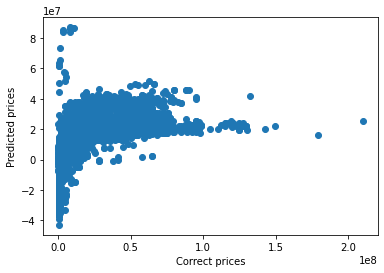

In [249]:
plt.scatter(yTrain, prediction)
plt.xlabel("Correct prices")
plt.ylabel("Predicted prices")
plt.show()

In [250]:
prediction = model.predict(xTest)
error = metrics.r2_score(yTest, prediction)
print("R squared error score: ", error)

R squared error score:  0.45858298040041723


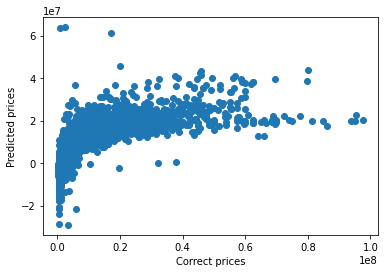

In [251]:
plt.scatter(yTest, prediction)
plt.xlabel("Correct prices")
plt.ylabel("Predicted prices")
plt.show()

In [252]:
simple = model.predict(xTest[:3])

print(simple)
print(xTest[:3])
print(yTest[:3])

[ 1234756.14122057 -6924836.2121588  12206815.78696442]
       Capacity  Year  Condition  Transmission  Fuel   Mileage
14177      1490  1986          1             1     0  125000.0
8561       1500  1960          1             1     0  100000.0
42411      1400  2018          1             0     0   80000.0
14177      775000.0
8561       525000.0
42411    26000000.0
Name: Price, dtype: float64
